In [19]:
import pandas as pd

# Cargamos el dataset
df = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
# Mostramos las primeras filas
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
# Vamos a buscar cuantas filas tiene una variable
account_length = df['Account Length'] # La notación de Brackets es la mas usada para extraer una columna de un dataframe

# Una columna es un objeto de tipo Series
# Los objetos de tipo Series y contienen los datos de la columna seleccionada
# El proceso de extraer una columna retorna un objeto de tipo Series
account_length.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [7]:
# Para extraer mas de una columna usamos la notación de brackets y le pasamos una lista con los nombres de las columnas
# El resultado es un dataframe
subset = df[['Account Length', 'Phone', 'Eve Charge', 'Day Calls']]
subset.head()
# Hemos obtenido un subconjunto del dataframe original


,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [9]:
# Tambien podemos crear una lista con los nombres de las columnas que queremos extraer
desired_columns = ['Account Length', 'Phone', 'Eve Charge', 'Day Calls']
subset = df[desired_columns]
subset.head()
# El resultado es el mismo que el anterior

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [12]:
# Tambien podemos extraer un subsets de columnas se puede llevar a cabo para obtener un subconjunto de filas
# Este enfoque nos permite ahorra memoria
# Cuando trabajamos con muchas columnas y queremos seleccionar casi todas las columnas excepto algunas
# Podemos generar el complemento de las columnas que queremos extraer

columnas_no_deseadas = set(['Account Length', 'VMail Message', 'Day Calls'])
todas_las_columnas = set(df.columns.values.tolist())
subconjunto = todas_las_columnas - columnas_no_deseadas

# El resultado es un conjunto de columnas que no estan en la lista de columnas no deseadas (set)
subset = df[list(subconjunto)]
subset.head()

,State,Night Mins,Intl Mins,Eve Charge,VMail Plan,Intl Calls,Eve Mins,Eve Calls,Night Calls,CustServ Calls,Churn?,Area Code,Night Charge,Phone,Int'l Plan,Intl Charge,Day Mins,Day Charge
0,KS,244.7,10.0,16.78,yes,3,197.4,99,91,1,False.,415,11.01,382-4657,no,2.70,265.1,45.07
1,OH,254.4,13.7,16.62,yes,3,195.5,103,103,1,False.,415,11.45,371-7191,no,3.70,161.6,27.47
2,NJ,162.6,12.2,10.30,no,5,121.2,110,104,0,False.,415,7.32,358-1921,no,3.29,243.4,41.38
3,OH,196.9,6.6,5.26,no,7,61.9,88,89,2,False.,408,8.86,375-9999,yes,1.78,299.4,50.90
4,OK,186.9,10.1,12.61,no,3,148.3,122,121,3,False.,415,8.41,330-6626,yes,2.73,166.7,28.34


In [27]:
# Filtrar los usuarios con mas de 300 minutos de noche
data1 = df[df["Night Mins"] > 300]
data1.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
42,AR,34,510,353-7289,no,no,0,124.8,82,21.22,...,98,23.99,311.5,78,14.02,10.0,4,2.70,2,False.
85,VT,128,510,388-6441,no,yes,29,179.3,104,30.48,...,86,19.20,323.0,78,14.54,8.6,7,2.32,0,False.
244,VA,108,408,335-1697,no,no,0,198.5,99,33.75,...,60,22.76,354.9,75,15.97,9.4,3,2.54,0,True.
289,OK,89,510,352-6976,no,no,0,303.9,95,51.66,...,114,22.18,312.1,89,14.04,5.3,3,1.43,1,True.


In [30]:
# Filtrar los usuarios con mas de 300 minutos de dia
data = df[df["Day Mins"] > 300]
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.
197,TX,208,510,378-3625,no,no,0,326.5,67,55.51,...,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True.
230,MD,93,408,360-3324,yes,no,0,312.0,109,53.04,...,100,11.00,217.6,74,9.79,10.5,2,2.84,0,True.
289,OK,89,510,352-6976,no,no,0,303.9,95,51.66,...,114,22.18,312.1,89,14.04,5.3,3,1.43,1,True.
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True.
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,123,5.65,246.5,99,11.09,9.2,10,2.48,4,False.
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,89,17.03,183.5,105,8.26,14.2,2,3.83,1,False.
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True.


In [33]:
# Usuarios de Nueva York (State = "NY")
data2 = df.query('State == "NY"')
data2.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
182,NY,67,408,405-2888,no,yes,36,115.6,111,19.65,...,94,20.20,169.9,103,7.65,9.9,12,2.67,2,False.
186,NY,106,408,422-1471,no,no,0,158.7,74,26.98,...,139,5.47,198.5,103,8.93,10.2,4,2.75,1,False.


In [41]:
data3 = df[(df["Day Mins"] > 300) & (df["State"] == "NY")]
data3.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True.


In [43]:
# Las personas que hablen mas de 300 minutos al dia o que esten en Nueva York
data4 = df[(df["Day Mins"] > 300) | (df["State"] == "NY")]
data4.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.


In [44]:
# Minutos de dia y de noche, dia y Longitud de la cuenta de los primeros 50 individuos
subset_first_50 = df[['Day Mins', 'Night Mins', 'Account Length']][:50]
subset_first_50.head()

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75


In [45]:
# Crear la columna de total de minutos
df['Total Mins'] = df['Day Mins'] + df['Night Mins'] + df['Eve Mins']
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,707.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,611.5
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,527.2
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,558.2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,501.9


In [1]:
# Generacion de numeros aleatorios
# Los metodos para generar numeros aleatorios usan el algoritmo de numeros pseudoaleatorios
# Para esto el algoritmo necesita una semilla (seed) que es un numero que se usa para iniciar el algoritmo
# Si se usa la misma semilla el algoritmo generara la misma secuencia de numeros aleatorios
# En un momento los numeros se repiten y el algoritmo se detiene
# Pero esto es muy improbable 
import numpy as np

# Generar un numero aleatorio entre 1 y 100 de tipo entero
np.random.randint(1,100)

58

In [2]:
# La forma mas clasica de generar numeros aleatorios es con la distribucion uniforme 
# Donde tenemos un numero aleatorio entre 0 y 1
np.random.random()

0.4730537501223444

In [3]:
# Si quiero generar una lista de numeros aleatorios entre 1 y 100
# Usamos la funcion randint de numpy

np.random.randint(1,100, size=50)

array([89, 74, 65, 49, 25, 57, 87, 25, 53, 73, 57, 91, 46, 90, 94, 58, 71,
       28,  9, 63, 34, 99, 54, 78, 26, 71, 64, 41, 82, 92,  6, 22, 21, 57,
       49, 93, 72, 14, 94,  7, 21, 15, 95, 22, 61, 47, 38, 54, 62, 24])

In [4]:
# Para generar numeros aleatorios multiplos de 7
# Usamos la funcion randrange de numpy
# La funcion randrange genera numeros aleatorios entre 0 y el numero que le pasemos como parametro
# Si le pasamos un numero mayor a 1, genera numeros aleatorios entre 0 y el numero que le pasamos
import random

for i in range(10):
    print(random.randrange(0, 100, 7))

77
70
84
77
56
35
7
84
56
49


In [5]:
# Para generar un rango de numeros entre 0 y 100
# Usamos la funcion arange de numpy
np.arange(0,100)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:

# Podemos usar la funcion shuffle de numpy para barajar los elementos de un array
a = np.arange(0,100)
np.random.shuffle(a)

In [7]:
# Para escoger un elemento aleatorio de un array
lista = df.columns.values.tolist()
np.random.choice(lista) # Escoge un elemento aleatorio de la lista


NameError: name 'df' is not defined

In [8]:
# Para reproducir los experimentos con numeros aleatorios
# Podemos fijar una semilla (seed) para que los numeros aleatorios sean los mismos
np.random.seed(2018)
for i in range(5):
    print(np.random.random())
# Los numeros aleatorios son los mismos sin importar cuantas veces se ejecute el codigo
# Establecer una semilla es importante para reproducir los experimentos
# Antes de llevar a cabo una receta de cocina es importante establecer una semilla para que los resultados sean los mismos

0.8823493117539459
0.10432773786047767
0.9070093335163405
0.3063988986063515
0.446408872427422


(array([16., 21., 20., 17., 23., 24., 17., 18., 23., 21.]),
 array([ 0.30358905, 10.26994027, 20.2362915 , 30.20264272, 40.16899394,
        50.13534516, 60.10169639, 70.06804761, 80.03439883, 90.00075006,
        99.96710128]),
 <BarContainer object of 10 artists>)

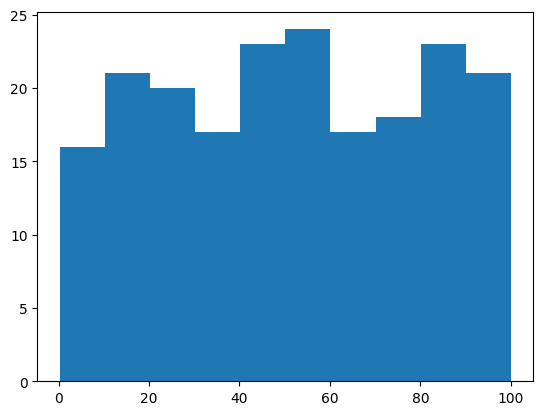

In [9]:
import matplotlib.pyplot as plt
# Funciones de distribucion de probabilidad
# Cuando hablamos de una variable aleatoria
# El conteo de cuantas veces esa variable aleatoria ocurre se llama 
# Distribucion de probabilidad.
# Para visualizar la distribucion de probabilidad de una variable aleatoria
# Usamos un histograma.
# PDF (Probability Density Function) Funcion de densidad de probabilidad
# Que nos indica la probabilidad de que una variable aleatoria tome un valor en un intervalo
# CDF (Cumulative Density Function) Funcion de densidad acumulada
# Que nos indica la probabilidad de que una variable aleatoria tome un valor menor o igual a un valor dado

# Distribución uniforme
data = np.random.uniform(0,100,200)
plt.hist(data)

(array([100067.,  99949., 100756., 100320., 100142.,  99755.,  99881.,
         99624.,  99768.,  99738.]),
 array([1.66521830e-04, 1.00001496e+01, 2.00001326e+01, 3.00001157e+01,
        4.00000988e+01, 5.00000818e+01, 6.00000649e+01, 7.00000479e+01,
        8.00000310e+01, 9.00000140e+01, 9.99999971e+01]),
 <BarContainer object of 10 artists>)

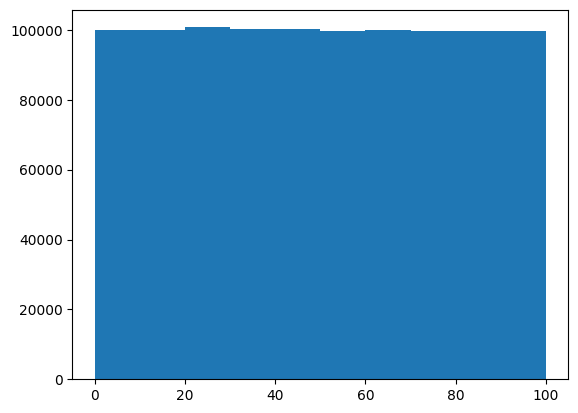

In [10]:
# La distribuciń es uniforme pero no se nota debido a que hemos generado 200 numeros aleatorios
# Si generamos muchos mas numeros aleatorios la distribucion se verá mas uniforme
# Distribución uniforme
data = np.random.uniform(0,100,1000000)
plt.hist(data)

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 3.0000e+00, 7.0000e+00, 4.0000e+00, 1.3000e+01,
        1.6000e+01, 2.0000e+01, 2.7000e+01, 3.7000e+01, 6.5000e+01,
        9.1000e+01, 1.1400e+02, 1.7600e+02, 2.1100e+02, 3.3700e+02,
        3.9900e+02, 5.7500e+02, 6.9400e+02, 1.0060e+03, 1.2660e+03,
        1.6420e+03, 2.0340e+03, 2.4980e+03, 3.2260e+03, 4.0130e+03,
        4.8140e+03, 5.7960e+03, 6.9880e+03, 8.3060e+03, 9.5830e+03,
        1.1578e+04, 1.3199e+04, 1.5405e+04, 1.7359e+04, 1.9358e+04,
        2.1582e+04, 2.3602e+04, 2.5854e+04, 2.8008e+04, 3.0374e+04,
        3.2305e+04, 3.3792e+04, 3.4875e+04, 3.6403e+04, 3.7462e+04,
        3.7923e+04, 3.8424e+04, 3.7983e+04, 3.7954e+04, 3.7220e+04,
        3.5919e+04, 3.4465e+04, 3.2330e+04, 3.0903e+04, 2.9011e+04,
        2.6697e+04, 2.4589e+04, 2.2459e+04, 2.0188e+04, 1.8274e+04,
        1.5702e+04, 1.3964e+04, 1.2153e+04, 1.0531e+04, 8.8380e+03,
        7.4280e+03, 6.2530e+03, 5.2050e+03, 4.27

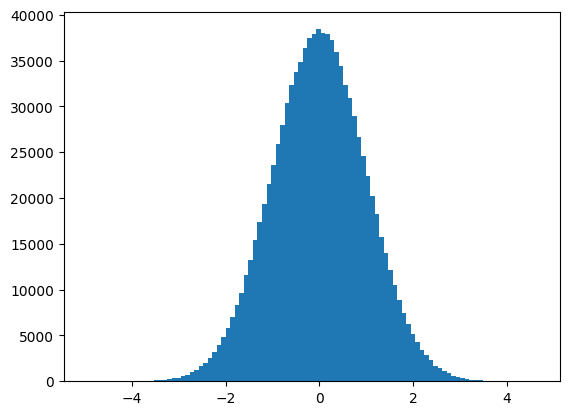

In [17]:
# Distribución normal 
# Es la distribución mas frecuente que ocurre en la vida real
# Casi todos los eventos aleatorios siguen una distribución normal
# Mientras mas datos tenemos nuestra distribución se acerca a una distribución normal
# Los datos que definen una distribución normal son la media y la desviación estandar
# La media es el valor central de la distribución
# La desviación estandar es una medida de dispersión de los datos
# Cuanto mas grande sea la desviación estandar mas dispersos estan los datos
# Cuanto mas pequeña sea la desviación estandar mas concentrados estan los datos
# La distribución normal es simetrica
# La media es el punto medio de la distribución
# La desviación estandar es la distancia entre la media y los puntos que se encuentran a 1 desviación estandar de la media
# La normal estandar se denomina campana de Gauss
# Con Python podemos generar una distribución normal con la funcion normal de numpy
n = 1_000_000
y = np.random.randn(n)
x = np.arange(n)
plt.hist(y, bins=100)

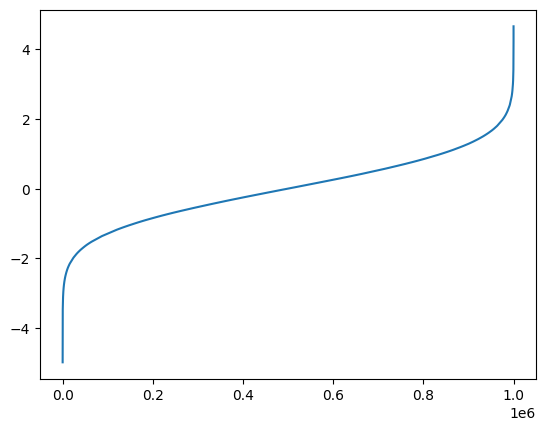

In [18]:
# La distribución normal es simetrica
plt.plot(x, sorted(y))

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   1.,   4.,   3.,   4.,   5.,   3.,   5.,   1.,  12.,  12.,
         15.,  22.,  21.,  26.,  31.,  44.,  47.,  66.,  64.,  60.,  71.,
         85., 114., 115., 173., 137., 151., 170., 196., 194., 232., 255.,
        240., 234., 272., 294., 307., 340., 288., 313., 348., 313., 316.,
        317., 311., 302., 306., 279., 266., 270., 237., 203., 205., 199.,
        209., 165., 127., 145., 104., 120.,  92., 102.,  51.,  60.,  54.,
         47.,  32.,  41.,  27.,  21.,  13.,  15.,  17.,  11.,  10.,  11.,
          2.,   2.,   2.,   6.,   1.,   4.,   2.,   0.,   1.,   1.,   0.,
          2.]),
 array([-5.24206001e+00, -5.04047400e+00, -4.83888800e+00, -4.63730199e+00,
        -4.43571598e+00, -4.23412998e+00, -4.03254397e+00, -3.83095796e+00,
        -3.62937195e+00, -3.42778595e+00, -3.22619994e+00, -3.02461393e+00,
        -2.82302793e+00, -2.62144192e+00, -2.41985591e+00, -2.21826991e+00,
        -2.016

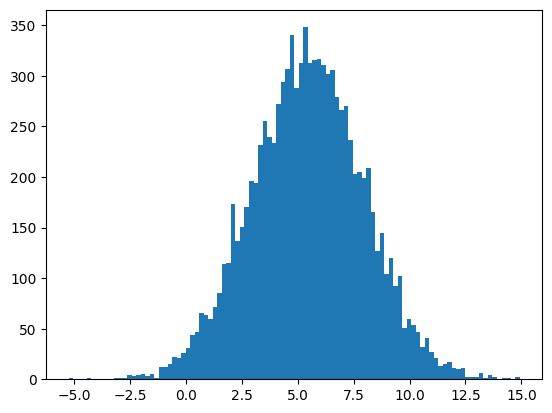

In [21]:
mu = 5.5
sd = 2.5
data = mu + sd * np.random.randn(10000)
plt.hist(data, bins=100)


In [33]:
# La simulacion de Monte Carlo
# La simulacion de Monte Carlo es un metodo de resolucion de problemas
# Que se basa en la generacion de numeros aleatorios
# La simulacion de Monte Carlo se usa para resolver problemas que no se pueden resolver de forma analitica

# Aproximacion de pi
# Vamos a usar el muestreo aleatorio para aproximar el valor de pi
# Generar dos numeros aleatorios x e y entre 0 y 1
# Calcular x * x + y * y es la ecuacion de la circunferencia
    # Si el valor es inferior a 1 estamos dentro del circulo
    # Si el valor es superior a 1 estamos fuera del circulo
# El circulo marca la distancia
# Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo
# Usamos dicha probabilidad para aproximar el valor de pi
# Repetimos el experimento un numero suficiente de veces para obtener diferentes aproximaciones de pi
repeticiones = 1000
pi_avg = 0
for i in range(repeticiones):
    n = 10_000
    x, y = np.random.rand(2, n)
    z = np.sqrt(x**2 + y**2)
    # Filtramos los valores que estan dentro del circulo
    casos_favorables = len(z[z <= 1])

    pi_avg += (casos_favorables * 4) / n

pi_value = pi_avg / repeticiones
print("La aproximacion de pi es: {}".format(pi_value))

La aproximacion de pi es: 3.142002799999998
